In [1]:
apikey = "6NePL82HvwyKa3uqrJNchO1sfKGEGb0JSUwTTIAVK7r99biTNcKUvASSIbpiSuQU"
secret = "aBXS4gFqIlEFDabrBVpzcpQ40jKISW8e7LmYlgClzztZKvWCwZOD8jpsem8SSx0j"

In [2]:
!pip install python-binance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.8 MB/s 
     |████████████████████████████████| 45 kB 4.4 MB/s 
     |████████████████████████████████| 292 kB 43.6 MB/s 
     |████████████████████████████████| 106 kB 72.9 MB/s 


In [3]:
!pip install pandas mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 7.1 MB/s 


In [4]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

In [5]:
client = Client(apikey, secret)

In [6]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.07344200'},
 {'symbol': 'LTCBTC', 'price': '0.00461600'},
 {'symbol': 'BNBBTC', 'price': '0.01891300'},
 {'symbol': 'NEOBTC', 'price': '0.00042200'},
 {'symbol': 'QTUMETH', 'price': '0.00181200'},
 {'symbol': 'EOSETH', 'price': '0.00077300'},
 {'symbol': 'SNTETH', 'price': '0.00001888'},
 {'symbol': 'BNTETH', 'price': '0.00030800'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00013360'},
 {'symbol': 'BNBETH', 'price': '0.25750000'},
 {'symbol': 'BTCUSDT', 'price': '16544.75000000'},
 {'symbol': 'ETHUSDT', 'price': '1215.09000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001319'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [8]:
FACTS = []
for dic in tickers:
  for value in dic.values():
      if value.endswith('USDT') or value.endswith('USD') or value.endswith('USDC'):
        FACTS.append(value)

print(FACTS)



862


In [ ]:
ticker_df=pd.DataFrame(tickers)

In [ ]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.07167000
1,LTCBTC,0.00286400
2,BNBBTC,0.01396400
3,NEOBTC,0.00045100
4,QTUMETH,0.00212400


In [ ]:
ticker_df.set_index('symbol', inplace=True)
ticker_df.head()

,price
symbol,
ETHBTC,0.07215100
LTCBTC,0.00284000
BNBBTC,0.01393800
NEOBTC,0.00045200
QTUMETH,0.00211300


In [ ]:
ticker_df.loc['ETHBTC']

price    0.07215100
Name: ETHBTC, dtype: object

In [ ]:
symbols = FACTS

In [ ]:
confirmed =[]
for symbol in symbols:
  hist = client.get_historical_klines(symbol,Client.KLINE_INTERVAL_1WEEK)
  hist_df = pd.DataFrame(hist)
  hist_df.columns =  ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                      'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
  hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
  hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')
  numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume'] 
  hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)
  try:
    x = hist_df.iloc[0]['Close']*10 
    y = hist_df.iloc[4]['Close']
    if x <= y:
      confirmed.append(symbol)
      #hist_df.to_csv('/content/drive/MyDrive/crypto/Binance/'+symbol+'.csv')
      print(symbol+' is done')
    else:
      print('pass '+ symbol)
      pass
  except IndexError:
        pass

  
  



pass BTCUSDT
pass ETHUSDT
pass BNBUSDT
pass BCCUSDT
pass NEOUSDT
pass LTCUSDT
pass QTUMUSDT
pass ADAUSDT
pass XRPUSDT
BTCTUSD is done
ETHTUSD is done
pass EOSUSDT
pass TUSDUSDT
pass IOTAUSDT
pass XLMUSDT
pass ONTUSDT
pass TRXUSDT
pass ETCUSDT
pass ICXUSDT
pass VENUSDT
pass NULSUSDT
pass VETUSDT
pass PAXUSDT
pass BCHABCUSDT
pass BCHSVUSDT
pass BNBTUSD
pass XRPTUSD
pass EOSTUSD
pass XLMTUSD
pass BNBUSDC
pass BTCUSDC
pass ETHUSDC
pass XRPUSDC
pass EOSUSDC
pass XLMUSDC
pass USDCUSDT
pass ADATUSD
pass TRXTUSD
pass NEOTUSD
pass PAXTUSD
pass USDCTUSD
pass LINKUSDT
pass LINKTUSD
pass LINKUSDC
pass WAVESUSDT
pass WAVESTUSD
pass WAVESUSDC
pass BCHABCTUSD
pass BCHABCUSDC
pass BCHSVTUSD
pass BCHSVUSDC
pass LTCTUSD
pass LTCUSDC
pass TRXUSDC
pass BTTUSDT
pass USDSUSDT
pass USDSTUSD
pass USDSUSDC
pass BTTTUSD
pass BTTUSDC
pass ONGUSDT
pass HOTUSDT
pass ZILUSDT
pass ZRXUSDT
pass FETUSDT
pass BATUSDT
pass XMRUSDT
pass ZECUSDT
pass ZECTUSD
pass ZECUSDC
pass IOSTUSDT
pass CELRUSDT
pass ADAUSDC
pass NEOUS

In [ ]:
print(len(confirmed))

2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hist = client.get_historical_klines('BTCTUSD',Client.KLINE_INTERVAL_1WEEK)

In [ ]:
hist

[[1526860800000,
  '0.00100000',
  '0.00100000',
  '0.00100000',
  '0.00100000',
  '1.00000000',
  1526971535524,
  '0.00100000',
  1,
  '0.00000000',
  '0.00000000',
  '0'],
 [1552262400000,
  '3872.00000000',
  '4050.00000000',
  '3783.07000000',
  '3963.05000000',
  '2627.46070700',
  1552867199999,
  '10282226.11389125',
  14891,
  '1493.92219200',
  '5851247.91568907',
  '0'],
 [1552867200000,
  '3960.95000000',
  '4100.00000000',
  '3897.27000000',
  '3976.70000000',
  '4033.89046900',
  1553471999999,
  '16069875.63051746',
  28264,
  '2120.89015700',
  '8448878.98725951',
  '0'],
 [1553472000000,
  '3972.44000000',
  '4198.00000000',
  '3859.18000000',
  '4094.54000000',
  '3726.11358600',
  1554076799999,
  '14924520.16254442',
  32910,
  '1812.27782700',
  '7259969.20723107',
  '0'],
 [1554076800000,
  '4090.00000000',
  '5935.00000000',
  '4040.54000000',
  '5187.76000000',
  '9643.56750600',
  1554681599999,
  '46419219.69216437',
  106102,
  '4786.45695800',
  '22987383.39

In [ ]:
hist_df = pd.DataFrame(hist)
hist_df.columns =  ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [ ]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
180,1660521600000,24311.66000000,25209.25000000,20777.30000000,21518.38000000,171.33589000,1661126399999,3905479.04009860,9762,77.63564000,1771724.66140680,0
181,1661126400000,21492.21000000,21860.03000000,19000.00000000,19552.21000000,134.29063000,1661731199999,2826561.73565750,7099,65.41662000,1380383.62493480,0
182,1661731200000,19555.47000000,20573.86000000,19552.58000000,19993.93000000,111.97440000,1662335999999,2237617.23648700,7544,70.35009000,1405021.99215640,0
183,1662336000000,20011.11000000,21857.52000000,18524.69000000,21833.33000000,119.98001000,1662940799999,2427265.62215140,9068,61.10720000,1240082.50245180,0
184,1662940800000,21840.88000000,22776.18000000,19338.67000000,19895.59000000,140.25449000,1663545599999,2896834.33921880,7122,67.70201000,1390390.71015630,0


In [ ]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [ ]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [ ]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [ ]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2018-05-21,0.001,0.001,0.001,0.001,1.000000,2018-05-22 06:45:35.524000000,1.000000e-03,1,0.000000,0.000000e+00,0
1,2019-03-11,3872.000,4050.000,3783.070,3963.050,2627.460707,2019-03-17 23:59:59.999000064,1.028223e+07,14891,1493.922192,5.851248e+06,0
2,2019-03-18,3960.950,4100.000,3897.270,3976.700,4033.890469,2019-03-24 23:59:59.999000064,1.606988e+07,28264,2120.890157,8.448879e+06,0
3,2019-03-25,3972.440,4198.000,3859.180,4094.540,3726.113586,2019-03-31 23:59:59.999000064,1.492452e+07,32910,1812.277827,7.259969e+06,0
4,2019-04-01,4090.000,5935.000,4040.540,5187.760,9643.567506,2019-04-07 23:59:59.999000064,4.641922e+07,106102,4786.456958,2.298738e+07,0


In [ ]:
x = hist_df.iloc[0]['Close']*10
y = hist_df.iloc[4]['Close']
x,y

(0.01, 5187.76)

In [ ]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
180,2022-08-15,24311.66,25209.25,20777.30,21518.38,171.33589,2022-08-21 23:59:59.999000064,3.905479e+06,9762,77.63564,1.771725e+06,0
181,2022-08-22,21492.21,21860.03,19000.00,19552.21,134.29063,2022-08-28 23:59:59.999000064,2.826562e+06,7099,65.41662,1.380384e+06,0
182,2022-08-29,19555.47,20573.86,19552.58,19993.93,111.97440,2022-09-04 23:59:59.999000064,2.237617e+06,7544,70.35009,1.405022e+06,0
183,2022-09-05,20011.11,21857.52,18524.69,21833.33,119.98001,2022-09-11 23:59:59.999000064,2.427266e+06,9068,61.10720,1.240083e+06,0
184,2022-09-12,21840.88,22776.18,19338.67,19895.59,140.25449,2022-09-18 23:59:59.999000064,2.896834e+06,7122,67.70201,1.390391e+06,0


In [ ]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,24.000000,24.000000,24.000000,24.000000,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
mean,6.512083,7.971667,5.562500,6.164583,3.453462e+06,3.652820e+07,1.196460e+05,1.680053e+06,1.788197e+07
std,3.272299,4.932196,2.721824,2.970312,4.511346e+06,8.605421e+07,2.036327e+05,2.220619e+06,4.244426e+07
min,3.210000,3.860000,2.870000,3.210000,4.400706e+05,2.212509e+06,1.577600e+04,2.079776e+05,1.047659e+06
25%,4.040000,4.877500,3.815000,4.037500,1.181082e+06,5.508629e+06,2.883175e+04,5.535737e+05,2.623127e+06
50%,5.010000,6.285000,4.645000,4.975000,1.817669e+06,8.325511e+06,5.009900e+04,8.925278e+05,3.906672e+06
75%,8.657500,9.217500,5.877500,6.835000,4.439284e+06,3.381102e+07,1.388842e+05,2.135001e+06,1.675245e+07
max,13.360000,25.550000,12.880000,13.360000,2.255350e+07,4.287790e+08,1.020079e+06,1.106612e+07,2.113925e+08


In [ ]:
import mplfinance as mpf

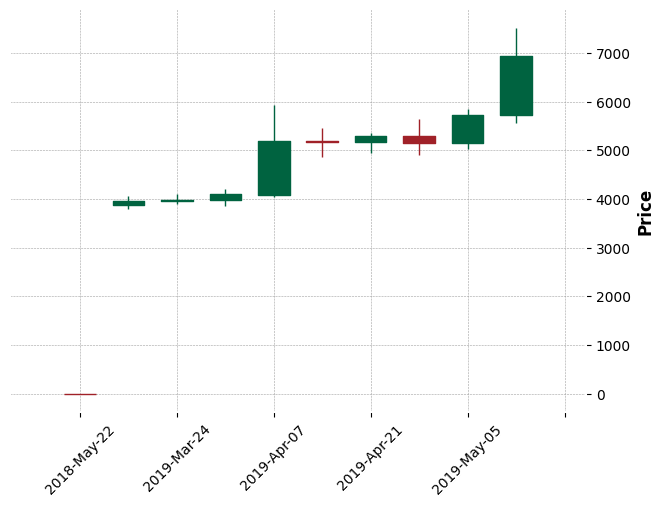

In [ ]:
mpf.plot(hist_df.set_index('Close Time').head(10), type="candle", style="charles")